In [1]:
# Investment Analysis Assignment

In [2]:
# Importing the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import chardet 

In [3]:
 with open('rounds2.csv','rb') as f:
        data = f.read(100000)  # or a chunk, f.read(1000000)
encoding=chardet.detect(data).get("encoding")
print(encoding)

Windows-1252


In [4]:
# I checked the encoding of the csv files in Ubuntu terminal using file command which gave 
# the proper encoding of the file, extended iso asccii, aka latin-1
comp=pd.read_csv('companies.csv', encoding='latin-1')
rnd2=pd.read_csv('rounds2.csv', encoding='latin-1')

In [5]:
# correcting the permalink and company_permalink columns in both the dataframes, converting them to lowercase
comp['permalink']=comp['permalink'].str.lower()
rnd2['company_permalink']=rnd2['company_permalink'].str.lower()

In [6]:
# To identify the unique number of companies in 'companies.csv' I used column 'permalink'
# There are few companies which have same name but different permalinks, that is due to different fouding location
# Hence permalink is selected for identifying the unique elements
# To identify the unisue number of companies in'rounds2.csv' I used column 'company_premalink'
print('Unique number of companies in companies.csv file: '+str(len(pd.unique(comp['permalink']))))
print('Unique number of companies in rounds2.csv file: '+str(len(pd.unique(rnd2['company_permalink']))))

Unique number of companies in companies.csv file: 66368
Unique number of companies in rounds2.csv file: 66370


In [7]:
# Merging the comp and rnd2 dataframes using the key 'permalink' and 'company_permalink' respectively
master_frame=pd.merge(comp, rnd2, how='inner', left_on='permalink',right_on='company_permalink')
print('\033[5m'+'Total number of observations in master_frame: '+'\033[0m'+str(len(master_frame)))

Total number of observations in master_frame: 114942


In [8]:
# Checking the number of null elements in master_frame
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                6132
category_list               3407
status                         0
country_code                8671
state_code                 10939
region                     10160
city                       10157
founded_at                 20520
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83803
funded_at                      0
raised_amount_usd          19984
dtype: int64

In [9]:
# Since the column raised_amount_usd is the target variable and imputing mean or median will impact the conclusions
# I decided to drop the NaN value rows
master_frame=master_frame[~np.isnan(master_frame['raised_amount_usd'])]
master_frame.isnull().sum()

permalink                      0
name                           1
homepage_url                4332
category_list               1044
status                         0
country_code                5850
state_code                  7603
region                      7047
city                        7044
founded_at                 15966
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         66789
funded_at                      0
raised_amount_usd              0
dtype: int64

## Funding Analysis

In [10]:
# Filtering the data according to the Funding type constraint
typ=['seed','angel','venture','private_equity']
master_frame=master_frame[master_frame['funding_round_type'].isin(typ)]

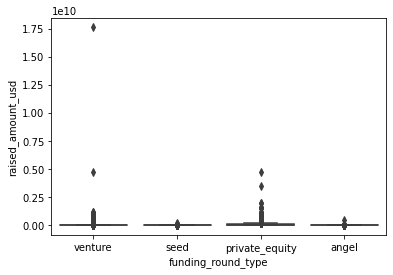

In [11]:
# Plotting box plot to visualise the data variation
import matplotlib as plt
sns.boxplot(x="funding_round_type", y="raised_amount_usd", data=master_frame)

In [12]:
# From the boxplot we can conclude that the mean value will not represent the funding amount well due 
# to the presence of outliers, hence I used median value as a representative value for each funding type

col_int='funding_round_type'; tar_var='raised_amount_usd' # Column of interest , Target variable

se=master_frame[master_frame[col_int]=='seed'][tar_var].median()
ag=master_frame[master_frame[col_int]=='angel'][tar_var].median()
ve=master_frame[master_frame[col_int]=='venture'][tar_var].median()
pe=master_frame[master_frame[col_int]=='private_equity'][tar_var].median()

# Storing the median representative values in a list for further use
re_values=[se, ag, ve, pe]
print('\033[5m'+'Representative Funding for Seed     :'+'\033[0m' +str(se)+' $')
print('\033[5m'+'Representative Funding for Angel    :'+'\033[0m' +str(ag)+' $')
print('\033[5m'+'Representative Funding for Venture  :'+'\033[0m' +str(ve)+' $')
print('\033[5m'+'Representative Private Equity Value :'+'\033[0m' +str(pe)+' $')

Representative Funding for Seed     :275000.0 $
Representative Funding for Angel    :400000.0 $
Representative Funding for Venture  :5000000.0 $
Representative Private Equity Value :20000000.0 $


In [13]:
# Creating the dataframe which would have the median values of each funding type to be used in Plot 1
dd={'Representative_value':re_values,'Funding':typ} 
re_val=pd.DataFrame(dd)
re_val

,Representative_value,Funding
0,275000.0,seed
1,400000.0,angel
2,5000000.0,venture
3,20000000.0,private_equity


In [14]:
# Hence we can conclude that the venture funding would be suitable for Sparks Fund
master_frame=master_frame[master_frame[col_int]=='venture']

## Country Analysis

In [15]:
pd.options.display.float_format = '${:,}'.format

In [16]:
# Identifying top nine countries as per the raised_amount_usd
cn=pd.Series(pd.unique(master_frame['country_code'])).dropna() # dropping NaN values
cnt={'Country':cn} # Creating Dictionary for dataframe
country=pd.DataFrame(cnt,columns=['Country','Total_Investment']) # Creating the dataframe country

country['Total_Investment']=country['Country'].apply(
    lambda v: master_frame[master_frame['country_code']==v].raised_amount_usd.sum())
# Identifying the top 9 country_codes/ countries
tp9=country.sort_values(by='Total_Investment').tail(9).set_index('Country')
tp9 # To be used in Plot 2

,Total_Investment
Country,
JPN,"$3,363,676,611.0"
DEU,"$6,346,959,822.0"
ISR,"$6,907,514,579.0"
FRA,"$7,259,536,732.0"
CAN,"$9,583,332,317.0"
IND,"$14,391,858,718.0"
GBR,"$20,245,627,416.0"
CHN,"$39,835,418,773.0"
USA,"$422,510,842,796.0"


In [17]:
# Creating a DataFrame where top nine countries are filtered out of the master_frame and spliting the category_list 
# column to include only one category
ctr=tp9.index.values.tolist() # list of top 9 countries

# Filtering the master_frame using the ctr list
top9=master_frame[master_frame.country_code.isin(ctr)]

# Correcting the category_list
top9['category_list']=top9['category_list'].str.split('|',expand=True)
top9

<ipython-input-17-1f55a874ad70>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top9['category_list']=top9['category_list'].str.split('|',expand=True)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,"$10,000,000.0"
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,"$2,000,000.0"
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,"$719,491.0"
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,"$20,000,000.0"
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,"$1,700,000.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114915,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/b4fce7f8a13267353d57db09099800e8,venture,NaN,11-07-2013,"$14,219,999.0"
114916,/organization/zyomyx-inc,ZYOMYX,http://www.zyomyx.com,Biotechnology,operating,USA,MO,MO - Other,Fremont,01-01-1998,/organization/zyomyx-inc,/funding-round/ea5b21da6cf999ff4d5667431fe318d7,venture,NaN,29-01-2010,"$555,016.0"
114927,/organization/zyrra,Zyrra,http://www.zyrra.com,E-Commerce,operating,USA,MA,Boston,Cambridge,NaN,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,NaN,18-10-2012,"$140,500.0"
114929,/organization/zystor,Zystor,http://www.zystor.com,Biotechnology,acquired,USA,WI,Milwaukee,Milwaukee,NaN,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,A,16-12-2004,"$8,500,000.0"


## Sector Analysis

In [18]:
# Reading the mapping.csv file and dropping unnecessary rows and columns 
# Using the category_list as index for the mapp dataframe
mapp=pd.read_csv('mapping.csv')

# Visualising the mapping data
mapp.head(23).style.apply(lambda x: ['background: lightgreen' if x.name == 20 else '' for i in x],axis=1)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,nan,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [19]:
# While exploring category_list, I found that na string part has been replaced with 0(eg. index 20 and 22 of mapp) 
# Hence I corrected it
mapp['category_list']=mapp['category_list'].str.replace('0', 'na')
mapp=mapp.drop([0]).drop('Blanks',axis=1).set_index('category_list')

In [20]:
# Creating a long format dataframe 'cat' from the wide format dataframe 'mapp'
cat=pd.DataFrame() # Creating an empty dataframe
cat['category_list']=mapp.index.values # Imputing the category list as a column

In [21]:
# Locating the primary_sector (column of mapp dataframe) for each category_list values
# Adding Primary_sector for each 'category_list' sector
cat['Primary_sector']=cat['category_list'].apply(lambda vv: mapp.loc[[vv],mapp.loc[vv].isin([1])].columns[0])

In [22]:
# Merging cat and top9 dataframes
top9=pd.merge(top9,cat,on='category_list',how='inner')
top9.sample(10)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Primary_sector
18727,/organization/synchrony,Synchrony,http://www.synchrony.com,Manufacturing,operating,USA,VA,Roanoke,Salem,01-01-1993,/organization/synchrony,/funding-round/b446159bf30f8c708d8a326b7bea3758,venture,C,13-01-2010,"$10,000,000.0",Manufacturing
22860,/organization/opower,Opower,http://www.opower.com,Clean Technology,ipo,USA,VA,"Washington, D.C.",Arlington,01-01-2007,/organization/opower,/funding-round/1a6bcac0fb19edffba93ee63ae148d50,venture,B,29-12-2008,"$14,000,000.0",Cleantech / Semiconductors
3635,/organization/epirus-biopharmaceuticals,Epirus Biopharmaceuticals,http://www.epirusbiopharma.com,Biotechnology,operating,USA,MA,Boston,Boston,NaN,/organization/epirus-biopharmaceuticals,/funding-round/6700bfbbbc0cb72212b532b85f00c4d8,venture,NaN,01-04-2012,"$8,083,000.0",Cleantech / Semiconductors
19396,/organization/doubleverify,DoubleVerify,http://www.doubleverify.com,Advertising,operating,USA,NY,New York City,New York,01-01-2008,/organization/doubleverify,/funding-round/f00a2bad17984425661a86f6eab3e5d3,venture,NaN,30-08-2011,"$33,000,000.0","Social, Finance, Analytics, Advertising"
19079,/organization/belly,Belly,http://www.bellycard.com,Advertising,operating,USA,IL,Chicago,Chicago,01-08-2011,/organization/belly,/funding-round/aebeb2806bb613baf870bdcee751f54d,venture,B,07-05-2012,"$10,000,000.0","Social, Finance, Analytics, Advertising"
8959,/organization/valen-technologies,Valen Analytics,http://valen.com,Analytics,operating,USA,CO,Denver,Denver,01-01-2002,/organization/valen-technologies,/funding-round/9215906bb0212ca05a63e0a650f81385,venture,C,13-11-2007,"$6,500,000.0","Social, Finance, Analytics, Advertising"
18164,/organization/direct-allergy,Direct Allergy,http://directallergy.com,Service Providers,operating,USA,PA,PA - Other,Erie,01-01-2013,/organization/direct-allergy,/funding-round/b82e4f983f382922a6eaecdb2c8be238,venture,NaN,20-11-2015,"$200,000.0",Others
38259,/organization/n-trig,N-Trig,http://www.n-trig.com,Embedded Hardware and Software,acquired,ISR,2,Tel Aviv,Kfar Saba,01-01-1999,/organization/n-trig,/funding-round/5424f8d2aa768a737b010ac1024308a0,venture,C,20-02-2008,"$28,000,000.0",Manufacturing
10990,/organization/apnex-medical,Apnex Medical,http://www.apnexmedical.com,Health Care,closed,USA,MN,Minneapolis,Saint Paul,01-01-2006,/organization/apnex-medical,/funding-round/f604247890f75501c88c7d1f1e4c54e9,venture,NaN,24-09-2012,"$10,000,000.0",Health
41281,/organization/community-leader,Community Leader,http://www.communityleader.com,Investment Management,operating,USA,MN,Minneapolis,Minneapolis,01-01-2011,/organization/community-leader,/funding-round/be5e3e70e1476e7e83a712a8c2b4f7da,venture,NaN,16-06-2015,"$1,250,000.0","Social, Finance, Analytics, Advertising"


In [23]:
# To identify the investment count country-wise
top9.country_code.value_counts().head(9)

USA    35784
GBR     2035
CHN     1547
CAN     1244
FRA      911
IND      819
ISR      782
DEU      552
JPN      269
Name: country_code, dtype: int64

In [24]:
# To Identify the top 3 Primary sectors for USA,GBR and IND
print('\033[5m'+'For USA (United States of America)\n'+'\033[0m',
      top9[top9['country_code']=='USA'].Primary_sector.value_counts()[0:3])

print('\033[5m'+'For GBR (United Kingdom)\n'+'\033[0m',
      top9[top9['country_code']=='GBR'].Primary_sector.value_counts()[0:3])

print('\033[5m'+'For IND (India)\n'+'\033[0m',
      top9[top9['country_code']=='IND'].Primary_sector.value_counts()[0:3])

For USA (United States of America)
 Others                                     8310
Cleantech / Semiconductors                 7857
Social, Finance, Analytics, Advertising    7246
Name: Primary_sector, dtype: int64
For GBR (United Kingdom)
 Others                                     516
Cleantech / Semiconductors                 437
Social, Finance, Analytics, Advertising    421
Name: Primary_sector, dtype: int64
For IND (India)
 Others                                     284
Social, Finance, Analytics, Advertising    147
News, Search and Messaging                 130
Name: Primary_sector, dtype: int64


In [25]:
# To identify the company with highest Investment in sectors Others and Cleantech/Semiconductors for USA
tar_var='raised_amount_usd'
sect_top='Others'
sect_sec='Cleantech / Semiconductors'
cc='USA' # country code
top=top9[(top9['country_code']==cc) & (top9['Primary_sector']==sect_top)].sort_values(by=tar_var)['name'].tolist()[-1]
sec=top9[(top9['country_code']==cc) & (top9['Primary_sector']==sect_sec)].sort_values(by=tar_var)['name'].tolist()[-1]
print('\033[5m'+'Company with Highest Investment in  Others Sector                   : '+ '\033[0m' + top)
print('\033[5m'+'Company with Highest Investment in  Cleantech/Semiconductors Sector : '+ '\033[0m' + sec)

Company with Highest Investment in  Others Sector                   : SoFi
Company with Highest Investment in  Cleantech/Semiconductors Sector : Freescale Semiconductor


In [26]:
# To identify the company with highest Investment in sectors Others and Cleantech/Semiconductors for GBR
tar_var='raised_amount_usd'
sect_top='Others'
sect_sec='Cleantech / Semiconductors'
cc='GBR' # country code
top=top9[(top9['country_code']==cc) & (top9['Primary_sector']==sect_top)].sort_values(by=tar_var)['name'].tolist()[-1]
sec=top9[(top9['country_code']==cc) & (top9['Primary_sector']==sect_sec)].sort_values(by=tar_var)['name'].tolist()[-1]
print('\033[5m'+'Company with Highest Investment in  Others Sector                   : '+ '\033[0m' + top)
print('\033[5m'+'Company with Highest Investment in  Cleantech/Semiconductors Sector : '+ '\033[0m' + sec)

Company with Highest Investment in  Others Sector                   : OneWeb
Company with Highest Investment in  Cleantech/Semiconductors Sector : Immunocore


In [27]:
# To identify the company with highest Investment in sectors Others and Social, Finance, Analytics, Advertising for IND
tar_var='raised_amount_usd'
sect_top='Others'
sect_sec='Social, Finance, Analytics, Advertising'
cc='IND' # country code
top=top9[(top9['country_code']==cc) & (top9['Primary_sector']==sect_top)].sort_values(by=tar_var)['name'].tolist()[-1]
sec=top9[(top9['country_code']==cc) & (top9['Primary_sector']==sect_sec)].sort_values(by=tar_var)['name'].tolist()[-1]
print('\033[5m'+'Company with Highest Investment in  Others Sector                                  : '+ '\033[0m' + top)
print('\033[5m'+'Company with Highest Investment in  Social, Finance, Analytics, Advertising Sector : '+ '\033[0m' + sec)

Company with Highest Investment in  Others Sector                                  : Flipkart
Company with Highest Investment in  Social, Finance, Analytics, Advertising Sector : ShopClues.com


## Plotting code 

In [28]:
import matplotlib.pyplot as plt
import matplotlib

In [29]:
sns.set_style(style="whitegrid")

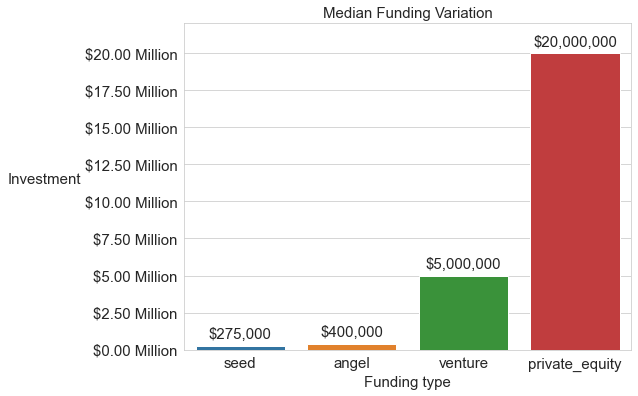

In [30]:
# Plot 1 code

# Plotting Bar plot using seaborn to understand funding in different stages
fig = plt.figure(figsize=(8, 6))
g=sns.barplot(x="Funding", y="Representative_value", data=re_val)

# Adding the investment amount as text for each bar (patch)
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x()+p.get_width()/2., height + 500000, '${:,.0f}'.format(height), ha="center",fontsize=15)

# Adjusting Labels 
plt.xlabel("Funding type", fontsize=15)
plt.ylabel("Investment", fontsize=15)
g.set_ylabel(g.get_ylabel(), rotation=0, horizontalalignment='right')

# Adjusting Ticks
ylabels = ['$'+'{:,.2f}'.format(x) + ' Million' for x in g.get_yticks()/1000000]
g.set_yticklabels(ylabels)
ax = plt.gca()
ax.tick_params(axis = 'x', which = 'major', labelsize = 15)
ax.tick_params(axis = 'y', which = 'major', labelsize = 15)

# Adjusting Title
ax.set_title('Median Funding Variation', fontsize=15)
# Setting x and y limits
ax.set_ylim([0,22000000])
plt.show()

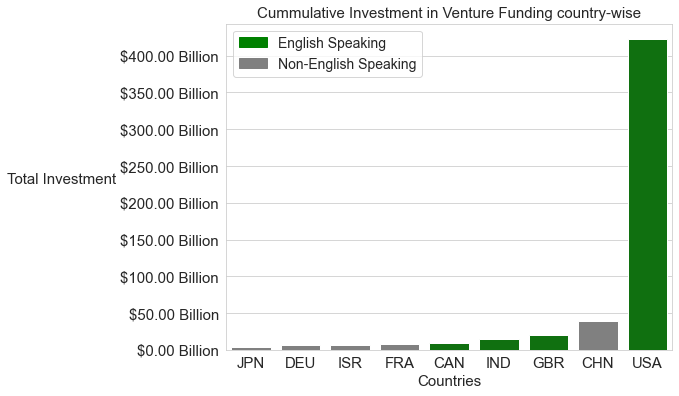

In [35]:
# Plot 2 code

fig = plt.figure(figsize=(8, 6))
# Using the dataframe tp9 to plot teh total Investment values in a bar plot form
tp=tp9.reset_index(drop=False)

# Assigning color as per the english speaking type
clr=['grey','grey','grey','grey','g','g','g','grey','g']

# Plotting bar plot using seaborn
g=sns.barplot(x="Country", y="Total_Investment", data=tp, palette=clr)

# Adjusting axis Labels
plt.ylabel("Total Investment",fontsize=15)
g.set_ylabel(g.get_ylabel(), rotation=0, horizontalalignment='right')
plt.xlabel("Countries",fontsize=15)

# ADjusting axis Ticks
ylab = ['$'+'{:,.2f}'.format(x) + ' Billion' for x in g.get_yticks()/1000000000]
g.set_yticklabels(ylab)
ax1 = plt.gca()
ax1.tick_params(axis = 'x', which = 'major', labelsize = 15)
ax1.tick_params(axis = 'y', which = 'major', labelsize = 15)

# Adjusting Title
ax1.set_title('Cummulative Investment in Venture Funding country-wise',fontsize=15)

# creating custom legend
name_to_color = {'English Speaking':   'green', 'Non-English Speaking': 'grey'} 
patches = [matplotlib.patches.Patch(color=v, label=k) for k,v in name_to_color.items()]
plt.legend(handles=patches, fontsize=14)

plt.show()

In [32]:
# Creating dataframe ctr_int for using it in Plot 3, it will have all the data required for the plot
ctr_int=tp.tail(4).drop([7]).reset_index(drop=True)
ctr_int

,Country,Total_Investment
0,IND,"$14,391,858,718.0"
1,GBR,"$20,245,627,416.0"
2,USA,"$422,510,842,796.0"


In [33]:
# Adding the required columns to ctr_int dataframe for plotting purpose in Plot 3

# Adding Top sector name
ctr_int['Top']=ctr_int['Country'].apply(
    lambda v: top9[top9['country_code']==v].Primary_sector.value_counts().index.values[0])
# Adding TOp sector count
ctr_int['Top_count']=ctr_int['Country'].apply(
    lambda v: top9[top9['country_code']==v].Primary_sector.value_counts().values[0])

# Adding Second_best sector name
ctr_int['Second_best']=ctr_int['Country'].apply(
    lambda v: top9[top9['country_code']==v].Primary_sector.value_counts().index.values[1])
# Adding Second_best sector count
ctr_int['Second_best_count']=ctr_int['Country'].apply(
    lambda v: top9[top9['country_code']==v].Primary_sector.value_counts().values[1])

# Adding Third_best sector name
ctr_int['Third_best']=ctr_int['Country'].apply(
    lambda v: top9[top9['country_code']==v].Primary_sector.value_counts().index.values[2])
# Adding Third_best sector count
ctr_int['Third_best_count']=ctr_int['Country'].apply(
    lambda v: top9[top9['country_code']==v].Primary_sector.value_counts().values[2])

ctr_int

,Country,Total_Investment,Top,Top_count,Second_best,Second_best_count,Third_best,Third_best_count
0,IND,"$14,391,858,718.0",Others,284,"Social, Finance, Analytics, Advertising",147,"News, Search and Messaging",130
1,GBR,"$20,245,627,416.0",Others,516,Cleantech / Semiconductors,437,"Social, Finance, Analytics, Advertising",421
2,USA,"$422,510,842,796.0",Others,8310,Cleantech / Semiconductors,7857,"Social, Finance, Analytics, Advertising",7246


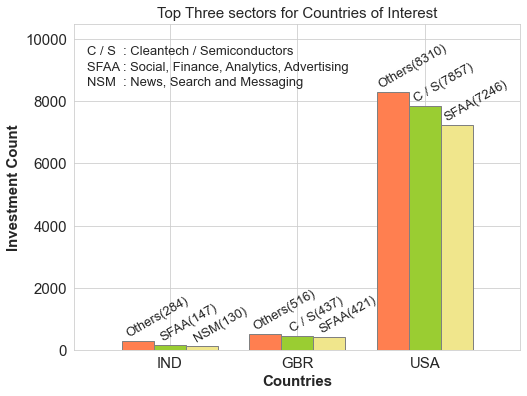

In [34]:
# Plot 3 
fig = plt.figure(figsize=(8, 6))

# Setting bar width
barWidth = 0.25

# Count list for the bar plot
Top=ctr_int['Top_count'].tolist()                 # The top sectors count list
Second_best=ctr_int['Second_best_count'].tolist() # The second best sectors count list
Third_best=ctr_int['Third_best_count'].tolist()   # The third best sectors count list
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 

# Making the Bar plot 
a=plt.bar(br1, Top, color ='coral', width = barWidth, edgecolor ='grey') 
b=plt.bar(br2, Second_best, color ='yellowgreen', width = barWidth, edgecolor ='grey') 
c=plt.bar(br3, Third_best, color ='khaki', width = barWidth, edgecolor ='grey') 

# Adding Primary sector names and values to the multi-bar plot patches
axx=plt.gca()
t1=ctr_int['Top'].tolist() # The top sectors name list
t2=['SFAA','C / S','C / S']# The second best sectors name abbreviated list
t3=['NSM','SFAA','SFAA']   # The third best sectors name abbreviated list

for p,v in zip(a.patches,t1) : # giving barplot patches and sector names for annotating the bars
    hgt = p.get_height()
    axx.text(p.get_x()+p.get_width()/2+0.15,hgt+150,v+'('+ str(hgt)+')',ha="center",rotation=30,fontsize=13)
    
for q,v in zip(b.patches,t2) : # giving barplot patches and sector names for annotating the bars
    hgt = q.get_height()
    axx.text(q.get_x()+q.get_width()/2+0.15,hgt+150,v+'('+ str(hgt)+')',ha="center",rotation=30,fontsize=13)
    
for r,v in zip(c.patches,t3) : # giving barplot patches and sector names for annotating the bars
    hgt = r.get_height()
    axx.text(r.get_x()+r.get_width()/2+0.15,hgt+150,v+'('+ str(hgt)+')',ha="center",rotation=30,fontsize=13)
    
# Adjusting x and y axis Labels
plt.xlabel('Countries', fontweight ='bold',fontsize=15) 
plt.ylabel('Investment Count', fontweight ='bold',fontsize=15) 

# Adjusting x and y axis Ticks
plt.xticks([r + barWidth for r in range(len(Top))],['IND', 'GBR', 'USA'])   
axx.tick_params(axis = 'x', which = 'major', labelsize = 15)
axx.tick_params(axis = 'y', which = 'major', labelsize = 15)

# Setting x and y limits
axx.set_ylim([0,10500])
axx.set_xlim([-0.5,3])

# Assigning an abbreviation Table
axx.text(-0.4,9500,'C / S  :' + ' Cleantech / Semiconductors',fontsize=13)
axx.text(-0.4,9000,'SFAA :' + ' Social, Finance, Analytics, Advertising',fontsize=13)
axx.text(-0.4,8500,'NSM  :' +' News, Search and Messaging',fontsize=13)

# Adjusting Title
axx.set_title('Top Three sectors for Countries of Interest',fontsize=15)

plt.show() 
